In [59]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv(r"C:\Users\advait\Downloads\HDFCBANK.csv")

In [61]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


<span style="color:black"># PRE-PROCESSING</span>

In [62]:
df.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)

In [63]:
series_shifted = df['Close'].shift()
df['Prev Close'] = series_shifted
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,HDFCBANK,EQ,NaN,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12


In [64]:
df.dropna(inplace=True)
df[['Date','Symbol','Open','High','Low','Close','Prev Close']]

,Date,Symbol,Open,High,Low,Close,Prev Close
1,2000-01-04,HDFCBANK,182.00,183.45,171.00,173.80,170.00
2,2000-01-05,HDFCBANK,170.00,173.90,165.00,166.95,173.80
3,2000-01-06,HDFCBANK,168.00,170.00,165.30,168.30,166.95
4,2000-01-07,HDFCBANK,162.15,171.00,162.15,168.35,168.30
5,2000-01-10,HDFCBANK,172.90,179.50,165.00,165.90,168.35
...,...,...,...,...,...,...,...
5301,2021-04-26,HDFCBANK,1413.00,1429.00,1402.75,1404.80,1414.15
5302,2021-04-27,HDFCBANK,1407.25,1442.00,1404.80,1438.70,1404.80
5303,2021-04-28,HDFCBANK,1436.25,1479.00,1431.00,1476.80,1438.70
5304,2021-04-29,HDFCBANK,1486.20,1503.65,1461.00,1472.50,1476.80


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5305 entries, 1 to 5305
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5305 non-null   object 
 1   Symbol      5305 non-null   object 
 2   Series      5305 non-null   object 
 3   Prev Close  5305 non-null   float64
 4   Open        5305 non-null   float64
 5   High        5305 non-null   float64
 6   Low         5305 non-null   float64
 7   Last        5305 non-null   float64
 8   Close       5305 non-null   float64
 9   VWAP        5305 non-null   float64
 10  Volume      5305 non-null   int64  
 11  Turnover    5305 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 538.8+ KB


In [66]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5.305000e+03,5.305000e+03
mean,1007.254053,1007.631385,1020.147163,993.978256,1007.521847,1007.488228,1007.087116,2.102970e+06,2.449297e+14
std,635.710618,635.416358,641.398943,629.459517,635.678685,635.630950,635.437777,3.970321e+06,4.778436e+14
min,163.400000,162.150000,167.900000,157.000000,163.000000,163.400000,161.400000,1.042000e+03,2.291142e+10
25%,479.950000,482.750000,486.950000,473.400000,481.000000,480.950000,480.150000,3.061880e+05,1.642027e+13
50%,935.000000,939.700000,954.000000,922.200000,936.200000,936.450000,937.470000,9.445620e+05,1.150500e+14
75%,1421.150000,1424.000000,1440.000000,1399.000000,1423.000000,1421.150000,1420.780000,2.124352e+06,2.154579e+14
max,2565.800000,2566.000000,2583.300000,2553.700000,2563.000000,2565.800000,2570.700000,1.005650e+08,1.426400e+16


In [67]:
df['Date'] = pd.to_datetime(df.Date)

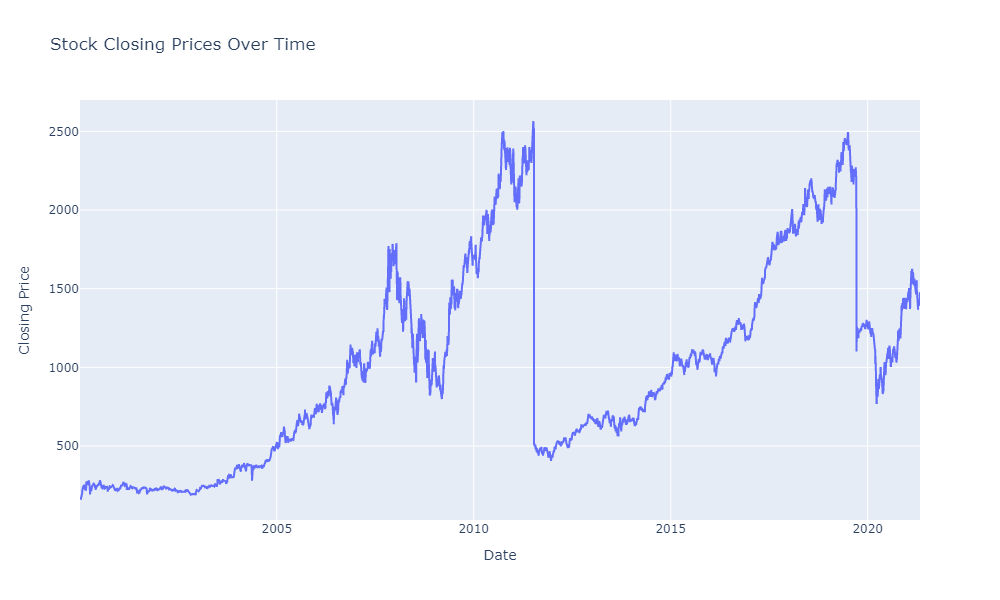

In [69]:
import plotly.graph_objects as go
from IPython.display import Image, display


fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Price'))


fig.update_layout(
    title='Stock Closing Prices Over Time',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    width=1000, 
    height=600
)



fig.write_image("stock_closing_prices.png", engine='orca')

display(Image(filename='stock_closing_prices.png'))

<span style="color:black"># MODEL CREATION</span>

In [70]:
x = df[['Open','Prev Close']]
y = df['Close']

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state =42)

In [72]:
print(x_train.shape,x_test.shape)

(3554, 2) (1751, 2)


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [74]:
print(reg.coef_)
print(reg.intercept_)

[0.94027433 0.05982184]
-0.11979445269525968


In [75]:
predicted = reg.predict(x_test)
print(x_test)

        Open  Prev Close
812    235.5      234.30
4039  1027.0     1026.70
4798  2250.0     2287.25
3066   536.4      530.40
1865  1105.5     1090.95
...      ...         ...
1698   900.3      890.15
137    250.0      251.25
4632  2121.0     2121.65
5217  1435.0     1441.80
577    226.8      224.75

[1751 rows x 2 columns]


In [76]:
_df = pd.DataFrame({"Actual":y_test, "Predicted":predicted})
print(_df)

       Actual    Predicted
812    233.15   235.331067
4039  1030.45  1026.961022
4798  2237.35  2252.324944
3066   529.35   535.972858
1865  1097.35  1104.616110
...       ...          ...
1698   931.00   899.659593
137    248.35   249.979024
4632  2114.30  2121.123059
5217  1411.35  1435.424993
577    224.95   226.579381

[1751 rows x 2 columns]


In [77]:
reg.score(x_test,y_test)

0.9991329315822302

In [78]:
import math

print("Mean Absolute Error",metrics.mean_absolute_error(y_test,predicted))
print("Mean Squared Error",metrics.mean_squared_error(y_test,predicted))
print("Root Mean Error",math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error 12.059358949887846
Mean Squared Error 349.361136361257
Root Mean Error 18.691204786242565


In [79]:
predicted = reg.predict(x)
print(predicted)

[ 181.1798458   170.12387685  167.8335486  ... 1436.41488831 1485.66080304
 1446.66426683]


<span style="color:black">### RESULT</span>

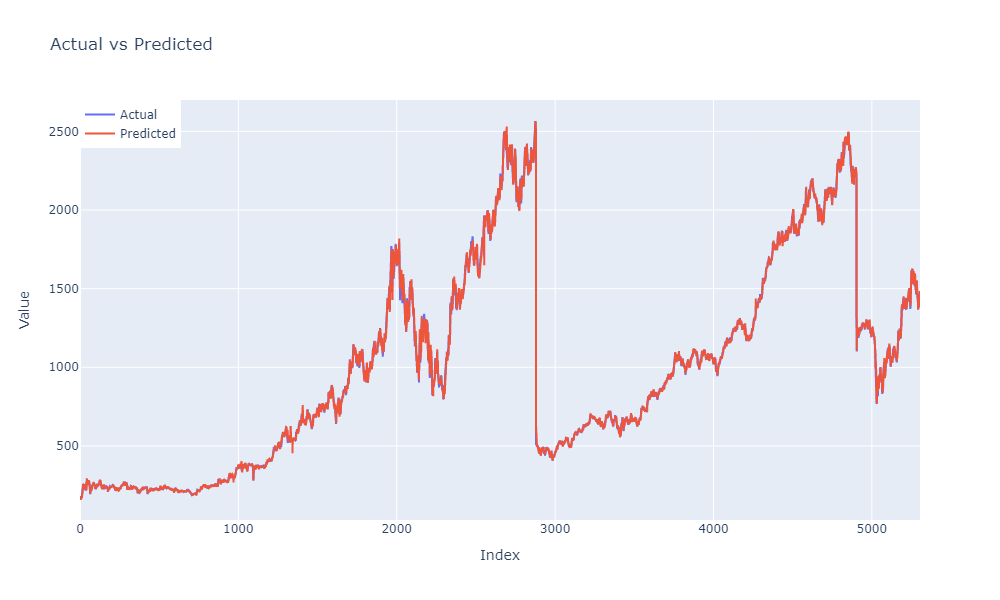

In [80]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=list(range(len(y))), y=y, mode='lines', name='Actual'))


fig.add_trace(go.Scatter(x=list(range(len(predicted))), y=predicted, mode='lines', name='Predicted'))


fig.update_layout(
    title='Actual vs Predicted',
    xaxis_title='Index',
    yaxis_title='Value',
    legend=dict(x=0, y=1),
    width=1000,
    height=600
)



fig.write_image("actual_vs_predicted.png", engine='orca')


display(Image(filename='actual_vs_predicted.png'))
